In [2]:
# Import packages
import json
import requests
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [3]:
rotary_shots_df = pd.read_csv("EYBL NW Rotary Shot Data.csv")

rotary_shots_df.drop(labels=["Unnamed: 18"], axis=1, inplace=True)
print(rotary_shots_df.isnull().sum())


yearSeason         0
idPlayer           0
namePlayer         0
nameTeam           0
typeEvent          0
typeAction         0
typeShot           0
dateGame           0
slugTeamHome       0
slugTeamAway       0
idGame             0
NumberHalf         0
zoneBasic          0
locationX          0
locationY          0
distanceShot       0
isShotAttempted    0
isShotMade         0
dtype: int64


In [4]:
def scale_locationX(dataset):
    # Copy the dataset to avoid modifying the original
    scaled_dataset = dataset.copy()

    # Scale the values in the locationX column
    scaled_dataset['locationX'] = (scaled_dataset['locationX'] / 25) * 250

    return scaled_dataset

# Example usage
scaled_dataset = scale_locationX(rotary_shots_df)
print(scaled_dataset['locationX'])

0     -120.0
1      150.0
2     -235.0
3      -30.0
4      -20.0
       ...  
244    -60.0
245    180.0
246     55.0
247     15.0
248    180.0
Name: locationX, Length: 249, dtype: float64


In [5]:
def scale_locationY(dataset):
    # Copy the dataset to avoid modifying the original
    scaled_dataset = dataset.copy()

    # Scale the values in the locationX column
    scaled_dataset['locationY'] = (scaled_dataset['locationY'] / 47) * 470

    return scaled_dataset

# Example usage
scaled_dataset = scale_locationY(rotary_shots_df)
print(scaled_dataset['locationY'])

0      130.0
1       30.0
2       30.0
3       60.0
4       30.0
       ...  
244     40.0
245    200.0
246     80.0
247     50.0
248    220.0
Name: locationY, Length: 249, dtype: float64


In [5]:
winters_df = scaled_dataset[scaled_dataset["namePlayer"] == 'Winters Grady']
isaac_df = scaled_dataset[scaled_dataset["namePlayer"] == 'Isaac Carr']

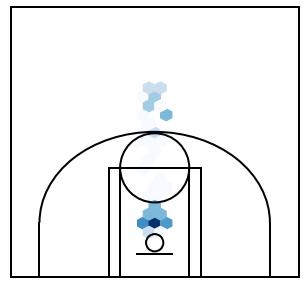

In [11]:
# Function to draw basketball court
def create_court(ax, color):
    # Plot hexbin of shots
   # Plot hexbin of shots with logarithmic binning
    ax.hexbin(winters_df['locationX'], winters_df['locationY'] + 60, gridsize=(30, 30), extent=(-300, 300, 0, 940), bins='log', cmap='Blues')

    # Short corner 3PT lines
    ax.plot([-200, -200], [0,94], linewidth=2, color=color)
    ax.plot([200, 200], [0, 94], linewidth=2, color=color)

    # 3PT Arc
    ax.add_artist(mpl.patches.Arc((0, 95), 400, 315, theta1=0, theta2=180, facecolor='none', edgecolor=color, lw=2))
    # Lane and Key

    ax.plot([-80, -80], [0, 190], linewidth=2, color=color)
    ax.plot([80, 80], [0, 190], linewidth=2, color=color)
    ax.plot([-60, -60], [0, 190], linewidth=2, color=color)
    ax.plot([60, 60], [0, 190], linewidth=2, color=color)
    ax.plot([-80, 80], [190, 190], linewidth=2, color=color)
    ax.add_artist(mpl.patches.Circle((0, 190), 60, facecolor='none', edgecolor=color, lw=2))

    # Rim
    ax.add_artist(mpl.patches.Circle((0, 60), 15, facecolor='none', edgecolor=color, lw=2))
    
    # Backboard
    ax.plot([-30, 30], [40, 40], linewidth=2, color=color)
    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Set axis limits
    ax.set_xlim(-250, 250)
    ax.set_ylim(0, 470)

# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2
# Draw basketball court
fig = plt.figure(figsize=(4, 3.76))
ax = fig.add_axes([0, 0, 1, 1])
ax = create_court(ax, 'black')
plt.show()


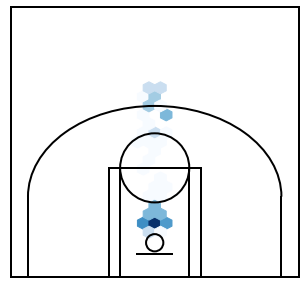

In [12]:
def create_court(ax, color):

    # Plot hexbin of shots with logarithmic binning
    ax.hexbin(winters_df['locationX'], winters_df['locationY'] + 60, gridsize=(30, 30), extent=(-300, 300, 0, 940), bins='log', cmap='Blues')

    # Short corner 3PT lines
    ax.plot([-220, -220], [0, 140], linewidth=2, color=color)
    ax.plot([220, 220], [0, 140], linewidth=2, color=color)

    # 3PT Arc
    ax.add_artist(mpl.patches.Arc((0, 140), 440, 315, theta1=0, theta2=180, facecolor='none', edgecolor=color, lw=2))
    # Lane and Key

    ax.plot([-80, -80], [0, 190], linewidth=2, color=color)
    ax.plot([80, 80], [0, 190], linewidth=2, color=color)
    ax.plot([-60, -60], [0, 190], linewidth=2, color=color)
    ax.plot([60, 60], [0, 190], linewidth=2, color=color)
    ax.plot([-80, 80], [190, 190], linewidth=2, color=color)
    ax.add_artist(mpl.patches.Circle((0, 190), 60, facecolor='none', edgecolor=color, lw=2))

    # Rim
    ax.add_artist(mpl.patches.Circle((0, 60), 15, facecolor='none', edgecolor=color, lw=2))
    
    # Backboard
    ax.plot([-30, 30], [40, 40], linewidth=2, color=color)
    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Set axis limits
    ax.set_xlim(-250, 250)
    ax.set_ylim(0, 470)

# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2
# Draw basketball court
fig = plt.figure(figsize=(4, 3.76))
ax = fig.add_axes([0, 0, 1, 1])
ax = create_court(ax, 'black')
plt.show()